In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

In [126]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('axes', labelsize=10)
plt.rc('ytick', labelsize=10)



datapath = Path() / "data" / "housing"
housing = pd.read_csv("D:\python_projekty\pum\data\housing\housing.csv")

In [127]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [128]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [129]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [130]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [131]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


<function matplotlib.pyplot.show(close=None, block=None)>

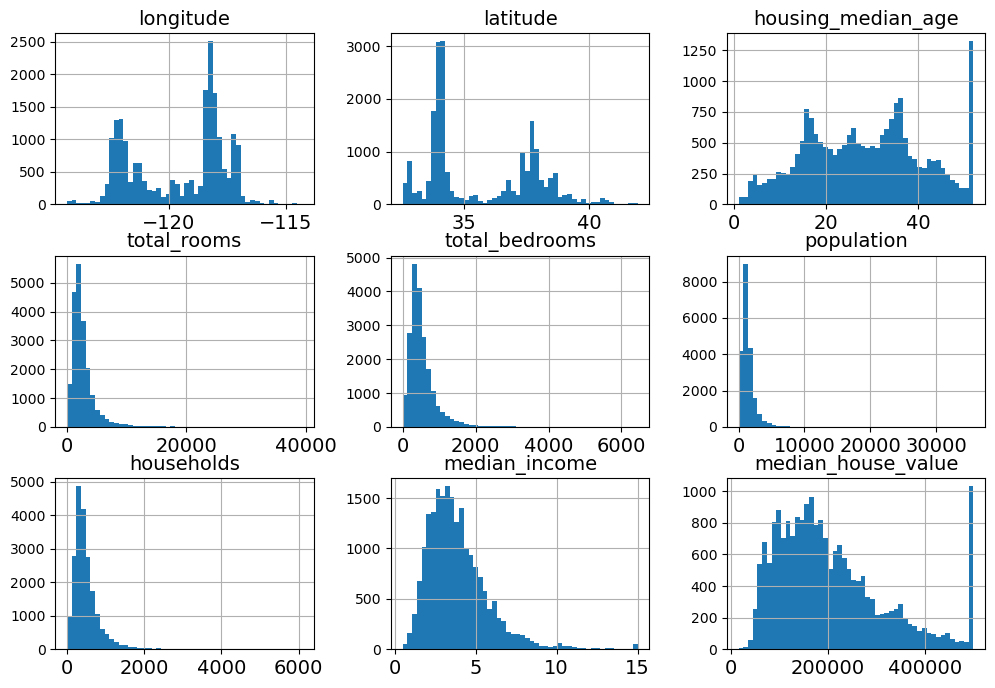

In [132]:
housing.hist(bins=50, figsize=(12,8))
plt.show

In [133]:
from sklearn.model_selection  import train_test_split

In [134]:
housing["income_cat"] = pd.cut(housing["median_income"],    
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],   
                                labels=[1, 2, 3, 4, 5])

In [135]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

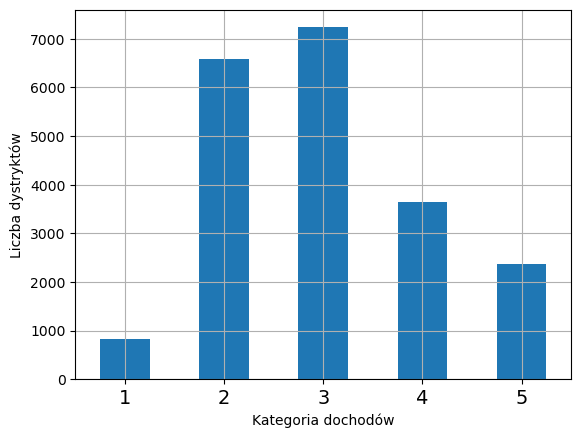

In [136]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [137]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42) #20% liczb przeznaczamy na zbior testowy
df_train, df_test = train_test_split(   
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)


In [138]:
def income_cat_proportions(data): #funkcja, która tworzy proporcje
    return data["income_cat"].value_counts() / len(data)
compare_samp = pd.DataFrame({   
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()

compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe %"] = (compare_samp["Warstwowe (%)"] /
                                    compare_samp["Łącznie (%)"] - 1)
compare_samp["Błąd losowe (%)"] = (compare_samp["Losowe (%)"] /
                                    compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)


,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe %,Błąd losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [139]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)


#https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

In [140]:
df_train_eda = df_train.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

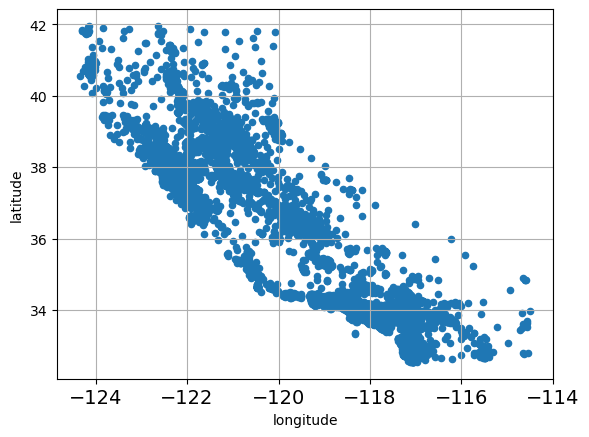

In [141]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

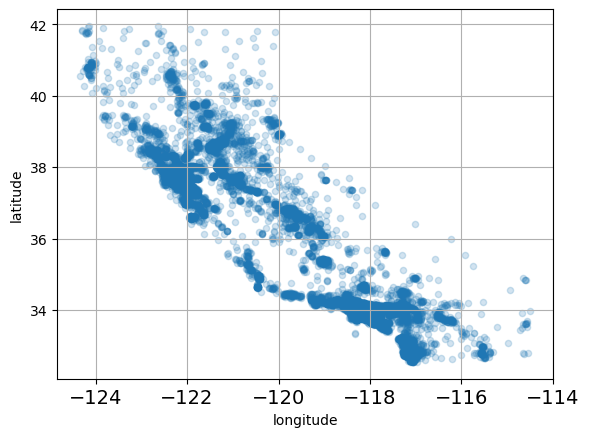

In [142]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show

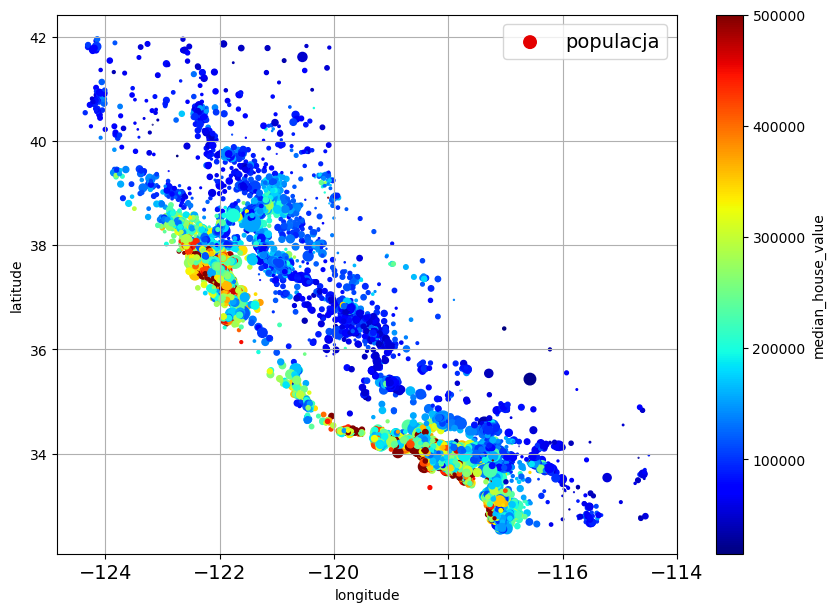

In [143]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=df_train_eda["population"] / 100, label="populacja",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
plt.show()

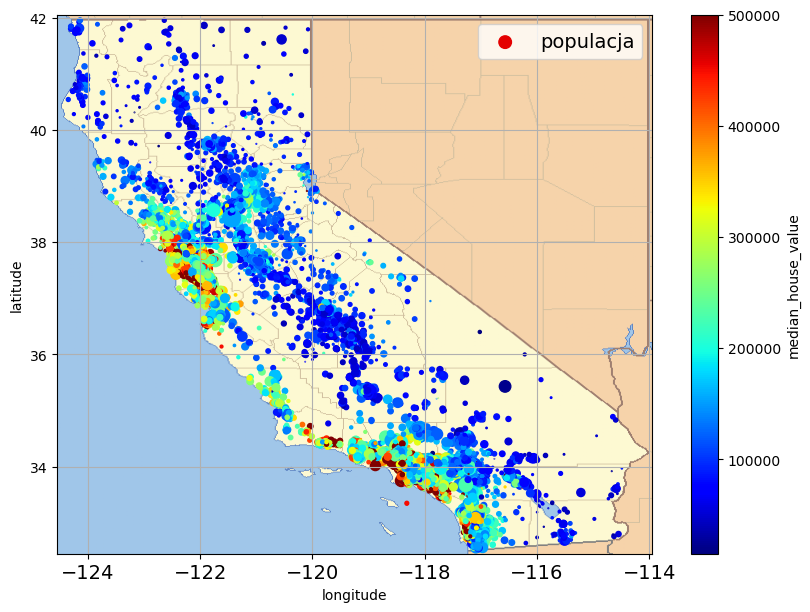

In [144]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=df_train_eda["population"] / 100, label="populacja",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread("D:\python_projekty\pum\data\housing\california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [145]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr() #wyszukiwanie korelacji

In [146]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

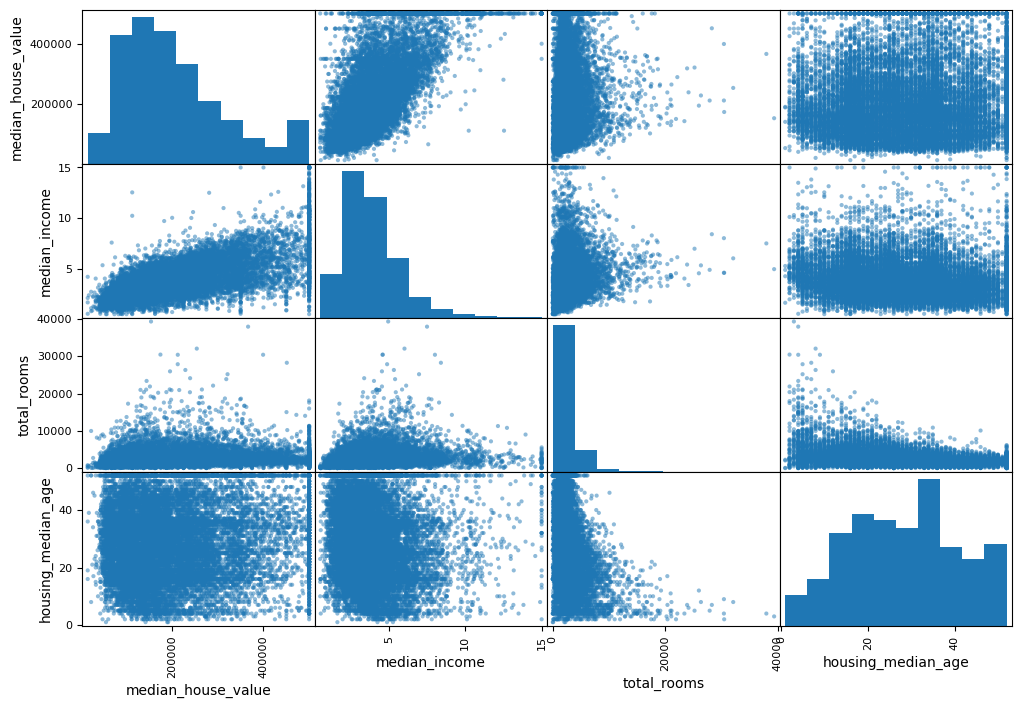

In [147]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12,8))
plt.show()

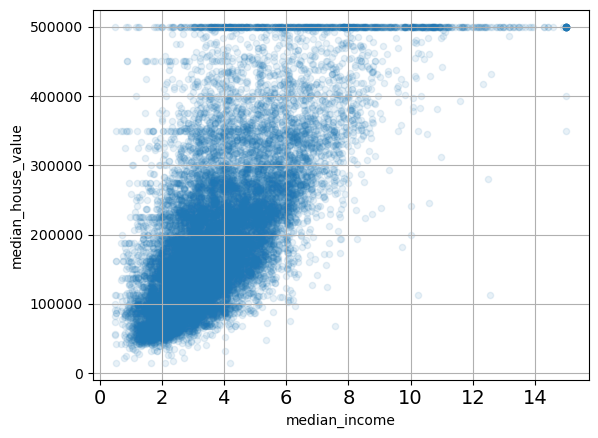

In [148]:
df_train_eda.plot(kind="scatter",x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [149]:
df_train_eda["pokoje_na_rodzinę"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["współczynnik_sypialni"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["liczba_osób_na_dom"] = df_train_eda["population"] / df_train_eda["households"]

In [150]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.688380
pokoje_na_rodzinę        0.143663
total_rooms              0.137455
housing_median_age       0.102175
households               0.071426
total_bedrooms           0.054635
population              -0.020153
liczba_osób_na_dom      -0.038224
longitude               -0.050859
latitude                -0.139584
współczynnik_sypialni   -0.256397
Name: median_house_value, dtype: float64

In [151]:
X_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [152]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [153]:
#X_train.dropna(subset=["total_bedrooms"], inplace=True) #rozwiazanie 1 (pozbywanie sie dystryktow zawierajacych brakujace dane)
#X_train.drop("total_bedrooms", axis=1) #usuniecie kolumny total bedrooms


In [154]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [155]:
df_train.isna().sum().sum()

168

In [156]:
'''python
X_train.dropna(subset=["total_bedrooms"], inplace=True) 

X_train.drop("total_bedrooms", axis=1)

median = X_train["total_bedrooms].fillna(median, inplace=True)
'''

'python\nX_train.dropna(subset=["total_bedrooms"], inplace=True) \n\nX_train.drop("total_bedrooms", axis=1)\n\nmedian = X_train["total_bedrooms].fillna(median, inplace=True)\n'

In [157]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [158]:
X_train_option1 = X_train.copy()

In [159]:
X_train_option1.dropna(subset=["total_bedrooms"], inplace=True) #rozwiazanie 1
X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [160]:
X_train_option2=X_train.copy()
X_train_option2.drop("total_bedrooms", axis=1, inplace=True) #rozwiazanie 2

X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [161]:
X_train_option3 = X_train.copy()

median = X_train["total_bedrooms"].median()
X_train_option3["total_bedrooms"].fillna(median, inplace=True) #rozwiazanie 3

X_train_option3.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [162]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #utworzenie obiektu klasy

In [163]:
X_train_num = X_train.select_dtypes(include=[np.number])

In [164]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [165]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [166]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [167]:
X = imputer.transform(X_train_num)

In [168]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [169]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns,
                          index=X_train_num.index)
X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [170]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [171]:
imputer = SimpleImputer(strategy='median').set_output(transform='pandas')
X = imputer.fit_transform(X_train_num)

In [172]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [173]:
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [174]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [175]:
X_train_cat["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

In [176]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [177]:
X_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


In [178]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [179]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default")
X_train_cat_1hot_default = cat_encoder_default.fit_transform(X_train_cat)
X_train_cat_1hot_default


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [180]:
X_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [181]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_cat_1hot_df = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [182]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [183]:
sample_df = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(sample_df)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [184]:
cat_encoder.transform(sample_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


In [185]:
X_train_num.describe()
# skalowanie cech

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [186]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)).set_output(transform= 'pandas')
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_num)

In [187]:
X_train_num_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-0.031060,-0.343033,0.081457,-0.865842,-0.826720,-0.825480,-0.813705,-0.535106
std,0.405806,0.453892,0.493558,0.111160,0.136532,0.134314,0.142940,0.260953
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.482759,-0.706383,-0.333333,-0.926497,-0.904977,-0.903815,-0.896211,-0.715507
50%,0.184584,-0.636170,0.098039,-0.892009,-0.860525,-0.857195,-0.848049,-0.580889
75%,0.286004,0.100000,0.411765,-0.839666,-0.792559,-0.788615,-0.775247,-0.413787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
from sklearn.preprocessing import StandardScaler
std_scaler =  StandardScaler().set_output(transform= "pandas")
X_train_num_min_max_scaled = std_scaler.fit_transform(X_train_num)

In [189]:
X_train_num_min_max_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,2.108500e-17,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.269200e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.731971e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.476096e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.502091e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.337988e+01,1.359152e+01,1.268893e+01,5.882868e+00


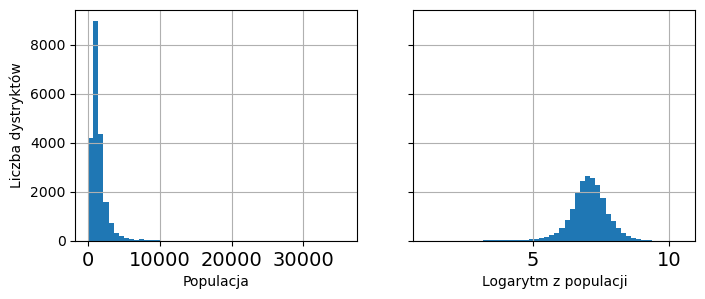

In [190]:

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Populacja")
axs[1].set_xlabel("Logarytm z populacji")
axs[0].set_ylabel("Liczba dystryktów")
plt.show()

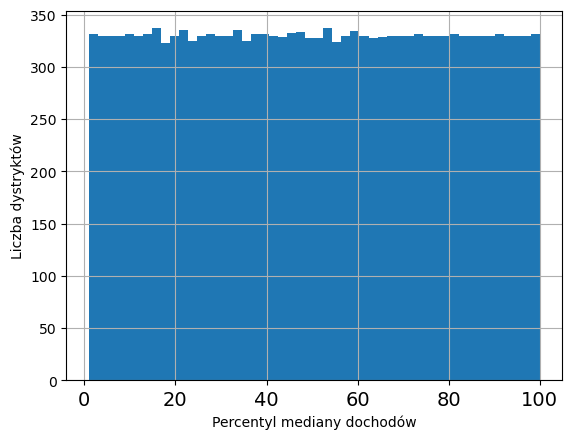

In [191]:
percentiles = [np.percentile(X_train["median_income"], p)
               for p in range(1, 100)]
X_train["median_income_percentile"] = pd.cut(X_train["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
X_train["median_income_percentile"] = X_train["median_income_percentile"].astype(int)
X_train["median_income_percentile"].hist(bins = 50)
plt.xlabel("Percentyl mediany dochodów")
plt.ylabel("Liczba dystryktów")
plt.show()

In [192]:
bins = [-np.inf] + percentiles + [np.inf]
bins

[-inf,
 1.0714,
 1.254332,
 1.4037979999999999,
 1.505532,
 1.6025200000000002,
 1.660964,
 1.7188,
 1.77868,
 1.8469929999999999,
 1.90937,
 1.967205,
 2.015964,
 2.0610750000000007,
 2.1071,
 2.150965,
 2.1875,
 2.225,
 2.2625,
 2.3079720000000004,
 2.3488800000000003,
 2.390786,
 2.4375,
 2.485318,
 2.5261639999999996,
 2.5625,
 2.592686,
 2.625,
 2.6658720000000007,
 2.701957,
 2.7382500000000003,
 2.790782,
 2.834752,
 2.879189,
 2.9219,
 2.968484999999999,
 3.008588,
 3.0375,
 3.0714720000000004,
 3.1071,
 3.1439,
 3.1736,
 3.2052,
 3.238746,
 3.2776400000000003,
 3.322825,
 3.369,
 3.408368,
 3.4583,
 3.505139,
 3.5385,
 3.575,
 3.615904000000001,
 3.6528,
 3.6875,
 3.725,
 3.769876000000002,
 3.8125,
 3.8655139999999997,
 3.9167,
 3.9688,
 4.011254999999999,
 4.0469,
 4.086179,
 4.1304,
 4.172445,
 4.220626,
 4.2679,
 4.3279440000000005,
 4.3839,
 4.43931,
 4.506162,
 4.566184,
 4.625,
 4.690542,
 4.75,
 4.82176,
 4.8958,
 4.981554,
 5.049838,
 5.1127400000000005,
 5.1907560000

In [193]:
X_train.drop("median_income_percentile", axis =1, inplace=True)

<Axes: >

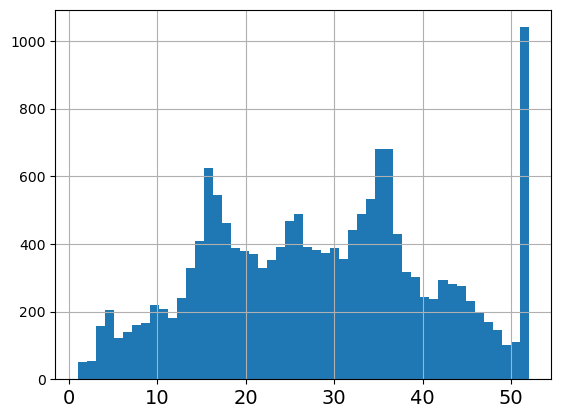

In [194]:
X_train["housing_median_age"].hist(bins=50)

In [195]:
from sklearn.metrics.pairwise import rbf_kernel

X_train["age_simil_35_v1"] = rbf_kernel(X_train[["housing_median_age"]], [[35]], gamma=0.1)
X_train["age_simil_35_v2"] = rbf_kernel(X_train[["housing_median_age"]], [[35]], gamma=0.03)

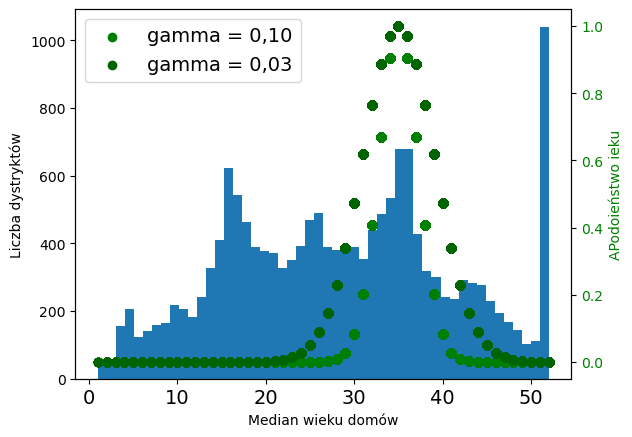

In [196]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Median wieku domów")
ax1.set_ylabel("Liczba dystryktów")
ax1.hist(X_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v1"], color="green", label="gamma = 0,10")
ax2.scatter(X_train["housing_median_age"], X_train["age_simil_35_v2"], color="darkgreen", label="gamma = 0,03")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_ylabel("APodoieństwo ieku", color="green")

plt.legend(loc="upper left")
plt.show()

In [197]:
X_train.drop(["age_simil_35_v1", "age_simil_35_v2"], axis=1, inplace = True)

In [198]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(y_train.to_frame())

model = LinearRegression()
model.fit(X_train[["median_income"]],scaled_labels)
some_new_data = X_train[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
preditions  = target_scaler.inverse_transform(scaled_predictions)

In [199]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [200]:
preditions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [201]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(X_train[["median_income"]],y_train)
preditions = model.predict(some_new_data)

In [202]:
preditions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [203]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train[["population"]])

In [204]:
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [205]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]],gamma=0.1))
age_simil_35 = rbf_transformer.transform(X_train[["housing_median_age"]])

In [206]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [207]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords],gamma = 0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.99566482],
       [0.99567518],
       [0.99655196],
       ...,
       [0.6599801 ],
       [0.6752005 ],
       [0.67616077]])

In [208]:
sample_array = np.array([[1., 2.], [3., 4.]])
sample_array

array([[1., 2.],
       [3., 4.]])

In [209]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(sample_array)

array([[0.5 ],
       [0.75]])

In [210]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean = True):
      self.with_mean = with_mean

    def fit(self, X, y=None):
        X= check_array(X)
        self.mean = X.mean(axis=0)
        self.scale = X.stf(axis=0)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X= check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
            return X / self.scale_
        
        

In [211]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Podobieństwo {i} skupienia" for i in range(self.n_clusters)]
    

In [212]:
cluster_simil = ClusterSimilarity(n_clusters = 10, gamma = 1., random_state = 42)
similarities = cluster_simil.fit_transform(
    X_train[["latitude", "longitude"]], 
    sample_weight = y_train
)

In [213]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

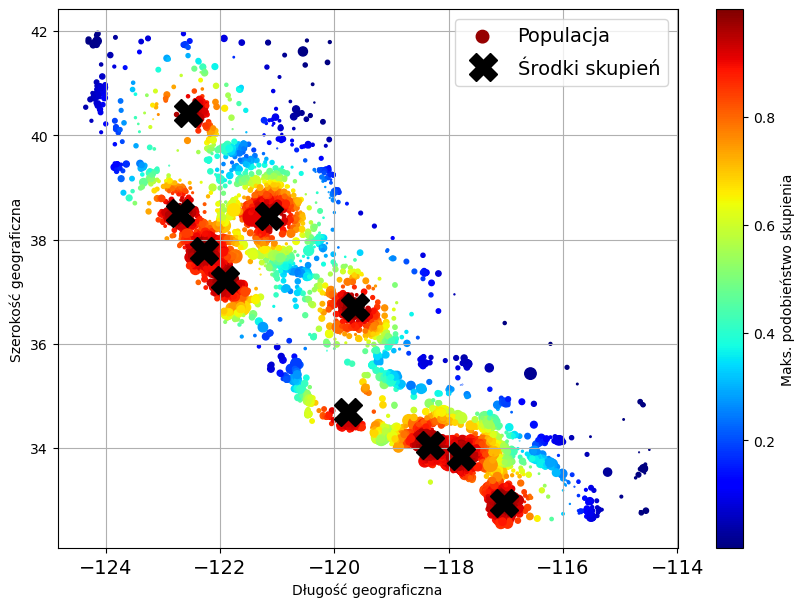

In [214]:
X_train_renamed = X_train.rename(columns={
    "latitude": "Szerokość geograficzna", "longitude": "Długość geograficzna",
    "population": "Populacja",
    "median_house_value": "Mediana wartości domu (USD)"})
X_train_renamed["Maks. podobieństwo skupienia"] = similarities.max(axis=1)

X_train_renamed.plot(kind="scatter", x="Długość geograficzna", y="Szerokość geograficzna", grid=True,
                      s=X_train_renamed["Populacja"]/100, label="Populacja",
                      c="Maks. podobieństwo skupienia",
                      cmap="jet", colorbar=True,
                      legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Środki skupień")
plt.legend(loc="upper right")
plt.show()

In [215]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [216]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [217]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline
               

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [218]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)
X_train_num_prepared_df = pd.DataFrame(
    X_train_num_prepared,
    columns = num_pipeline.get_feature_names_out(),
    index = X_train_num.index
)
X_train_num_prepared_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.837216e-15,-2.580838e-15,-1.473843e-17,-5.916886e-17,1.039220e-16,4.765783e-17,1.463085e-17,7.611267e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387765e+00,-1.447452e+00,-2.191210e+00,-1.206927e+00,-1.272777e+00,-1.299382e+00,-1.303343e+00,-1.781577e+00
25%,-1.113124e+00,-8.005453e-01,-8.404335e-01,-5.456668e-01,-5.710538e-01,-5.832443e-01,-5.772176e-01,-6.913383e-01
50%,5.314128e-01,-6.458502e-01,3.359809e-02,-2.354008e-01,-2.462699e-01,-2.361370e-01,-2.402747e-01,-1.754490e-01
75%,7.813423e-01,9.761041e-01,6.692575e-01,2.354897e-01,2.468327e-01,2.744761e-01,2.690575e-01,4.649198e-01
max,2.540847e+00,2.959014e+00,1.861119e+00,1.678576e+01,1.344681e+01,1.359152e+01,1.268893e+01,5.882868e+00


In [219]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [220]:
num_pipeline[1]

StandardScaler()

In [221]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [222]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [223]:

num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [224]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocena_proximity"]
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocena_proximity'])])

In [225]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001964966D690>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019648124B50>)])

In [226]:
X_train_prepared = preprocessing.fit_transform(X_train)

In [227]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return["ratio"] # nazwy tych cech

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("Współczynnik_sypialni", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("pokoje_na_rodzinę", ratio_pipeline(), ["total_rooms", "households"]),
    ("liczba_osób_na_dom", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                          "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline) #pozostaje jako kolumna:housing_median_age

In [228]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 24)

In [229]:
preprocessing.get_feature_names_out()

array(['Współczynnik_sypialni__ratio', 'pokoje_na_rodzinę__ratio',
       'liczba_osób_na_dom__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Podobieństwo 0 skupienia',
       'geo__Podobieństwo 1 skupienia', 'geo__Podobieństwo 2 skupienia',
       'geo__Podobieństwo 3 skupienia', 'geo__Podobieństwo 4 skupienia',
       'geo__Podobieństwo 5 skupienia', 'geo__Podobieństwo 6 skupienia',
       'geo__Podobieństwo 7 skupienia', 'geo__Podobieństwo 8 skupienia',
       'geo__Podobieństwo 9 skupienia', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [230]:
X_train_num_prepared_df = pd.DataFrame(
    X_train_prepared,
    columns = preprocessing.get_feature_names_out(),
    index = X_train.index
)
X_train_num_prepared_df

,Współczynnik_sypialni__ratio,pokoje_na_rodzinę__ratio,liczba_osób_na_dom__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Podobieństwo 0 skupienia,geo__Podobieństwo 1 skupienia,...,geo__Podobieństwo 6 skupienia,geo__Podobieństwo 7 skupienia,geo__Podobieństwo 8 skupienia,geo__Podobieństwo 9 skupienia,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,8.489216e-04,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,5.614049e-27,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,5.641131e-03,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.913326e-35,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,5.421817e-30,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.878046e-28,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087
13105,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,7.663746e-14,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146
19301,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,1.715187e-42,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721
19121,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,2.464809e-27,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257


In [231]:
from sklearn.linear_model import LinearRegression
lin_reg  = LinearRegression()
lin_reg.fit(X=X_train_num_prepared_df, y=y_train)

LinearRegression()

In [232]:
X_train_predictions = lin_reg.predict(X_train_num_prepared_df)

In [233]:
print(X_train_predictions[:5].round(-2))
print(y_train.iloc[:5].values)

[246000. 372700. 135700.  91400. 330900.]
[458300. 483800. 101700.  96100. 361800.]


In [252]:
import sklearn
print(sklearn.__version__)


1.6.1


In [242]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_true = y_train, y_pred = X_train_predictions,squared=False)
lin_rmse

4757259431.847188

<Axes: >

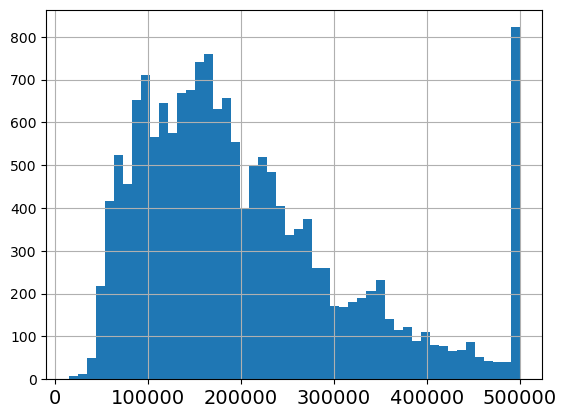

In [244]:
y_train.hist(bins=50)

In [245]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X=X_train_num_prepared_df, y=y_train)

DecisionTreeRegressor(random_state=42)

In [266]:
X_train_predictions = tree_reg.predict(X_train_num_prepared_df)

tree_rmse = sklearn.metrics.root_mean_squared_error(y_true=y_train, y_pred=X_train_predictions)
tree_rmse

0.0

In [267]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    estimator=tree_reg,
    X= X_train_num_prepared_df,
    y=y_train,
    scoring="neg_root_mean_squared_error", 
    cv=10
    )
tree_rmses

array([68111.04600529, 63467.80938601, 63627.40376336, 66551.083619  ,
       61615.02376863, 64618.11762235, 64885.24197354, 69247.62296406,
       70344.23216025, 65912.49154673])

In [268]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     65838.007281
std       2755.728595
min      61615.023769
25%      63875.082228
50%      65398.866760
75%      67721.055409
max      70344.232160
dtype: float64

In [269]:

lin_rmses = -cross_val_score(
    estimator=lin_reg,
    X= X_train_num_prepared_df,
    y=y_train,
    scoring="neg_root_mean_squared_error", 
    cv=10
    )
pd.Series(lin_rmses).describe()

count       10.000000
mean     70204.936656
std       4027.076706
min      66092.699714
25%      68354.701381
50%      69010.765589
75%      70087.047198
max      80822.013715
dtype: float64

In [270]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(
    estimator=forest_reg, 
    X= X_train_num_prepared_df,
    y=y_train,
    scoring="neg_root_mean_squared_error",
    cv=10)

In [271]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47094.829161
std       1000.139793
min      45639.276222
25%      46521.490986
50%      47202.921972
75%      47357.745111
max      49383.316250
dtype: float64

In [272]:
forest_reg.fit(X=X_train_num_prepared_df,y=y_train)
X_train_predictions = forest_reg.predict(X_train_num_prepared_df)
forest_rmse = sklearn.metrics.root_mean_squared_error(y_true=y_train, y_pred=X_train_predictions
                                 )
forest_rmse

17551.2122500877

In [273]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X=X_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('Współczynnik_sypialni',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019647BA6C90>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [274]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

In [275]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [276]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Współczynnik_sypialni',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019647E80B90>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [277]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.549743,0.029988,0.141765,0.014692,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,8.339327,0.052372,0.131656,0.000805,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,4.409660,0.018503,0.132461,0.000301,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
7,6.288146,0.016070,0.129644,0.004242,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
9,6.271020,0.029802,0.133301,0.000465,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


In [280]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('Współczynnik_sypialni',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(f...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019647E83090>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019660660E90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [281]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,10.443836,0.012989,0.140236,0.005935,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41341.655457,-42242.449878,-43056.683024,-42213.596120,700.454278,1
8,8.054901,0.009594,0.135814,0.000866,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41825.023754,-42275.119344,-43241.044537,-42447.062545,590.735171,2
0,18.139460,0.303232,0.137150,0.001861,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42238.113363,-42938.035062,-43353.747344,-42843.298590,460.355691,3
5,5.159549,0.093832,0.151932,0.025158,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41869.304323,-43362.130948,-43663.532455,-42964.989242,784.476385,4
2,8.863665,0.046827,0.141953,0.017866,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42490.231129,-42928.051069,-43718.249300,-43045.510499,508.169719,5


In [282]:
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Współczynnik_sypialni',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_na...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019660661C90>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [283]:
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [284]:
sorted(zip(
        feature_importances,
        final_model["preprocessing"].get_feature_names_out()),
    reverse=True
 )

[(0.18599734460509473, 'log__median_income'),
 (0.07338850855844488, 'cat__ocean_proximity_INLAND'),
 (0.06556941990883974, 'Współczynnik_sypialni__ratio'),
 (0.05364871007672531, 'pokoje_na_rodzinę__ratio'),
 (0.04598870861894748, 'liczba_osób_na_dom__ratio'),
 (0.04175269214442519, 'geo__Podobieństwo 30 skupienia'),
 (0.025976797232869674, 'geo__Podobieństwo 25 skupienia'),
 (0.023595895886342252, 'geo__Podobieństwo 36 skupienia'),
 (0.02021056221732893, 'geo__Podobieństwo 9 skupienia'),
 (0.018606917076661445, 'geo__Podobieństwo 34 skupienia'),
 (0.01813798837462886, 'geo__Podobieństwo 37 skupienia'),
 (0.01740435316632674, 'geo__Podobieństwo 18 skupienia'),
 (0.01677838614384489, 'geo__Podobieństwo 1 skupienia'),
 (0.015459009666188978, 'geo__Podobieństwo 7 skupienia'),
 (0.015325731028175922, 'geo__Podobieństwo 32 skupienia'),
 (0.015073772015038346, 'geo__Podobieństwo 13 skupienia'),
 (0.014272160962173803, 'geo__Podobieństwo 35 skupienia'),
 (0.014180636461860477, 'geo__Podobień

In [285]:
X_test = df_test.drop("median_house_value", axis=1)
y_test = df_test["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = sklearn.metrics.root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41445.533268606625


In [297]:
from scipy import stats
squared_errors = (final_predictions - y_test)**2
alpha = 0.05
np.sqrt(stats.t.interval(1-alpha, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39293.55594722, 43491.1590655 ])

In [305]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + (1-alpha)) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39293.555947221386, 43491.15906550365)

In [308]:
zscore = stats.norm.ppf((1 + (1-alpha)) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39294.20435203821, 43490.573233502204)

In [309]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']